# 06 King County House Sales - Time Series Analysis

### This notebook contains:
    01. Importing Libraries
    02. Importing Data
    03. Data Wrangling & Cleaning
    04. Time Series Analysis
        A. Visualization
        B. Decomposing Data
        C. Dickey-Fuller Test
        D. Autocorrelation Test 1
        E. Stationarizing Time Series Data
        F. Autocorrelation Test 2

## 01. Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

## 02. Importing Data

In [2]:
# turning project folder path into string
path = r'/Users/lisa/DA Projects/01-2023 King County House Sales'

In [3]:
# importing house sale data
dfhs = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'kc_house_data_price-cats.csv'), index_col = False)

In [4]:
# check
dfhs.head()

,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category
0,0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,low price
1,1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,medium price
2,2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,low price
3,3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,medium price
4,4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,medium price


In [5]:
# dropping index columns
dfhs = dfhs.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [6]:
#check
dfhs.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,low price
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,medium price
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,low price
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,medium price
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,medium price


In [7]:
dfhs.shape

(21596, 22)

In [8]:
dfhs.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_category'],
      dtype='object')

## 03. Data Wrangling & Cleaning

<AxesSubplot:xlabel='price', ylabel='Count'>

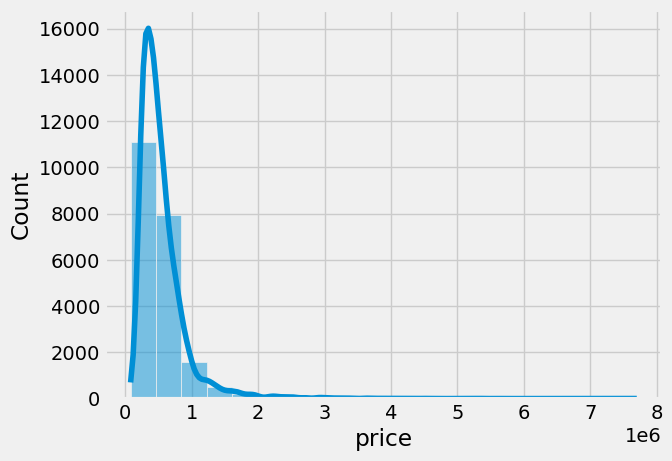

In [9]:
# looking at distribution of house prices
sns.histplot(dfhs['price'], bins=20, kde = True)

In [10]:
# creating subset with price, date & sqft_living variable
df = dfhs[['date', 'price', 'sqft_living']]

In [11]:
df.head()

,date,price,sqft_living
0,20141013T000000,221900.0,1180
1,20141209T000000,538000.0,2570
2,20150225T000000,180000.0,770
3,20141209T000000,604000.0,1960
4,20150218T000000,510000.0,1680


In [12]:
# creating new column with price per sqft
df['sqft_price'] = (df['price'] / df['sqft_living'])

In [13]:
df.head()

,date,price,sqft_living,sqft_price
0,20141013T000000,221900.0,1180,188.050847
1,20141209T000000,538000.0,2570,209.338521
2,20150225T000000,180000.0,770,233.766234
3,20141209T000000,604000.0,1960,308.163265
4,20150218T000000,510000.0,1680,303.571429


<AxesSubplot:xlabel='sqft_price', ylabel='Count'>

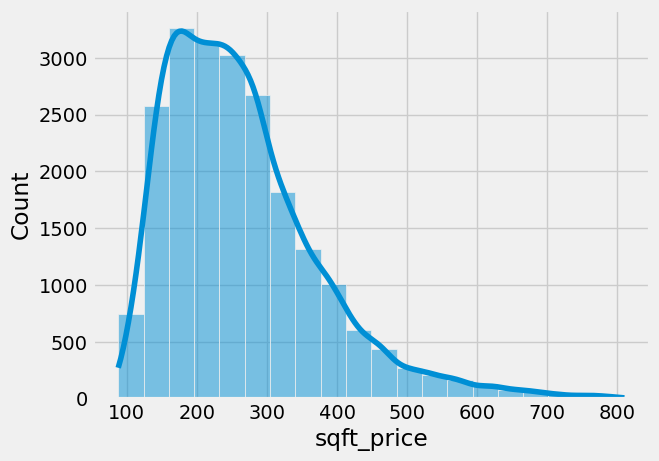

In [14]:
# looking at distribution of sqft price
sns.histplot(df['sqft_price'], bins=20, kde = True)

In [15]:
# set date column as index and drop date
from datetime import datetime

df['datetime'] = pd.to_datetime(df['date'],format='%Y-%m-%d') 
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True) 
df.head()

,price,sqft_living,sqft_price
datetime,,,
2014-10-13,221900.0,1180,188.050847
2014-12-09,538000.0,2570,209.338521
2015-02-25,180000.0,770,233.766234
2014-12-09,604000.0,1960,308.163265
2015-02-18,510000.0,1680,303.571429


In [16]:
# sort dataframe by date
df = df.sort_values(by='datetime')

In [17]:
df.head()

,price,sqft_living,sqft_price
datetime,,,
2014-05-02,308500.0,850,362.941176
2014-05-02,335000.0,1350,248.148148
2014-05-02,440000.0,800,550.000000
2014-05-02,588500.0,2330,252.575107
2014-05-02,470000.0,2210,212.669683


In [18]:
df.shape

(21596, 3)

In [19]:
# creating new dataframe with column date & median sqft price per month 
# & grouping data by month
data = df.groupby(pd.Grouper(freq='m')).agg({'sqft_price': ['median']})

In [20]:
data.head()

,sqft_price
,median
datetime,
2014-05-31,244.456797
2014-06-30,248.516129
2014-07-31,241.716867
2014-08-31,246.268657
2014-09-30,243.083004


In [21]:
data.shape

(13, 1)

The data was cleaned in previous analysis steps.

I decided to look at the housing prices for this analysis part but we have a wide range of house prices so instead I calculated the price per sqft for each house. Because we have a skewed distribution of values and multiple values for one day, I decided to create a new column to calculate the median sqft price for each month. 
Using the same logic it could be possible to look at specific zipcode areas later and investigate the price development. For the purpose of this exercise I choose to look at the sqft price for the whole of King County.

Note: I grouped the sqft price by month as a means to smooth the data as the values grouped by day showed a large amount of noise.

## 04. Time Series Analysis

### A. Visualization

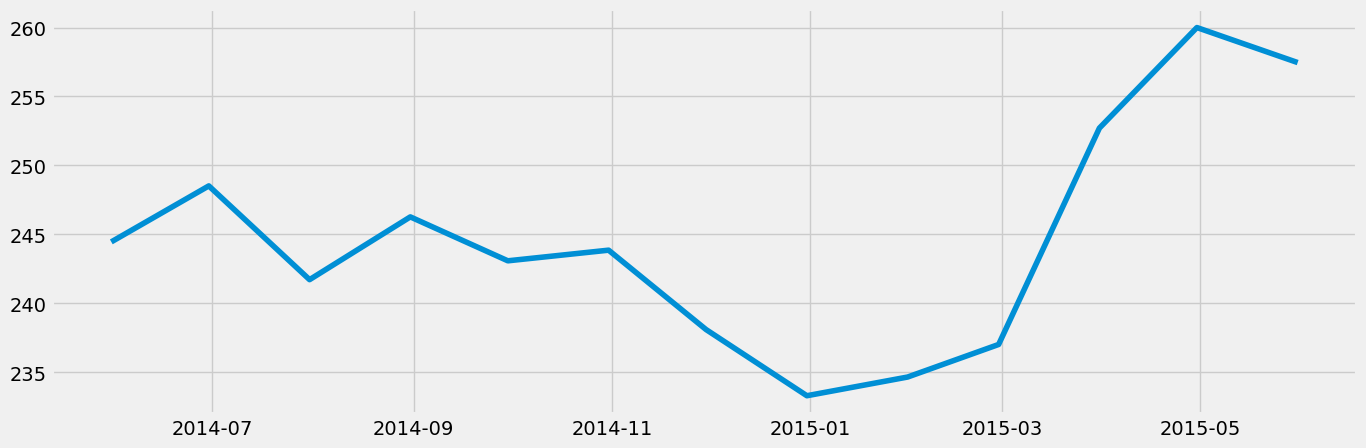

In [22]:
# creating line chart
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

### B. Decomposing Data

In [23]:
# Decomposing the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(x=data[('sqft_price', 'median')], model='additive',  extrapolate_trend='freq', period=1)

In [24]:
# define fixed size for all special charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

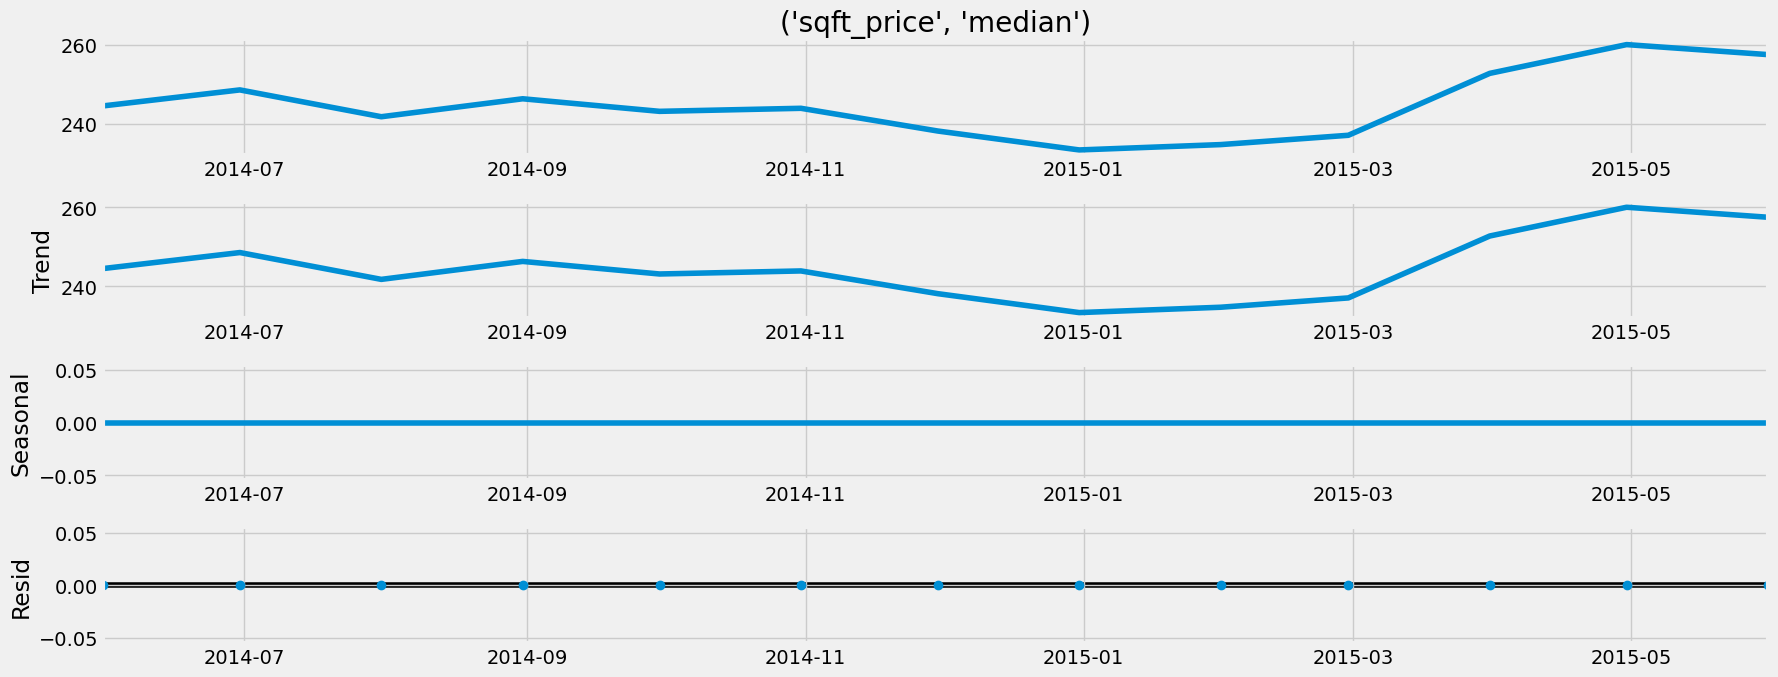

In [25]:
# Plot components
decomposition.plot()
plt.show()

The decomposition shows an upwards trend from March 2015 (lowest point) on but seems to decrease from May2015 (highest point) on again. 
There are no seasonal fluctuations depicted in the graph above, which is logical as we only look at data from around 1 year (13 month) which therefore won't allow us to draw conclusions on its seasonality.
There are no up or down deviations discernable in the residual section. 

### C. Dickey-Fuller Test

In [26]:
# conducting Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries):
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(data[('sqft_price', 'median')])

Dickey-Fuller Stationarity test:
Test Statistic                -1.648568
p-value                        0.457787
Number of Lags Used            4.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


#### Null-Hypothesis: Presence of a unit root (non-stationary)  
#### Alternate Hypothesis: Unit root present (stationary)  

The test statistic (-1.648568) is larger than the (5%) critical value (-3.367187) which means that we can not reject the null-hypothesis. The p-value of 0.45 is far greater than 0.05 and is insignificant.

The data is non-stationary. Any trends and unnecessary variances need to be removed.

### D. Autocorrelation Test 1

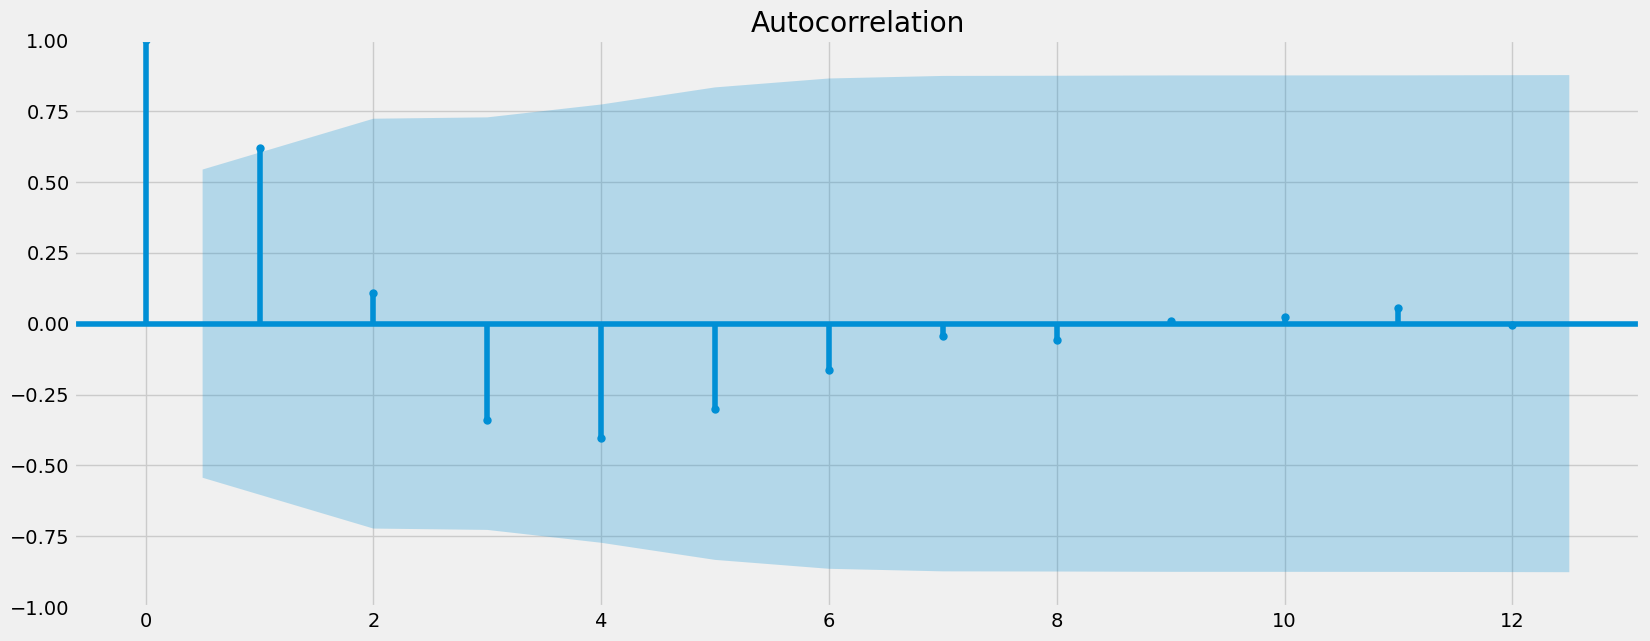

In [27]:
# Testing for autocorrelation in non-stationary data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data)
plt.show()

Testing the autocorrelation in the non-stationary data shows that two lines (lags) go above the blue edge of the confidence interval. Those lags are correlated with each other which further proves the non-stationarity of the data.

### E. Stationarizing Time Series Data

In [28]:
# differencing data
data_diff = data - data.shift(1)

In [29]:
# dropping NANs from differenced data
data_diff.dropna(inplace = True)

In [30]:
data_diff.head()

,sqft_price
,median
datetime,
2014-06-30,4.059332
2014-07-31,-6.799262
2014-08-31,4.551789
2014-09-30,-3.185653
2014-10-31,0.772342


In [31]:
data_diff.columns

MultiIndex([('sqft_price', 'median')],
           )

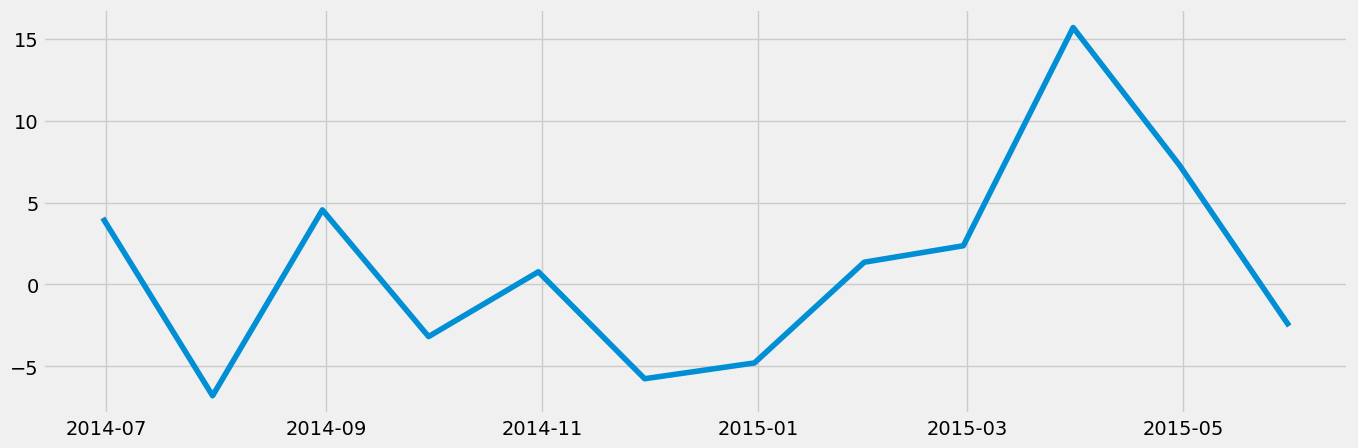

In [32]:
# plotting differenced data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [33]:
# dickey fuller test
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -4.461941
p-value                        0.000230
Number of Lags Used            3.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


The data is now stationary. 

The test statistic (-4.46) is smaller than the (5%) cristical value (-3.36). 

The p-value is smaller than 0.05 and is satisfactory.

The Null Hypothesis can now be rejected.

### F. Autocorrelation Test 2

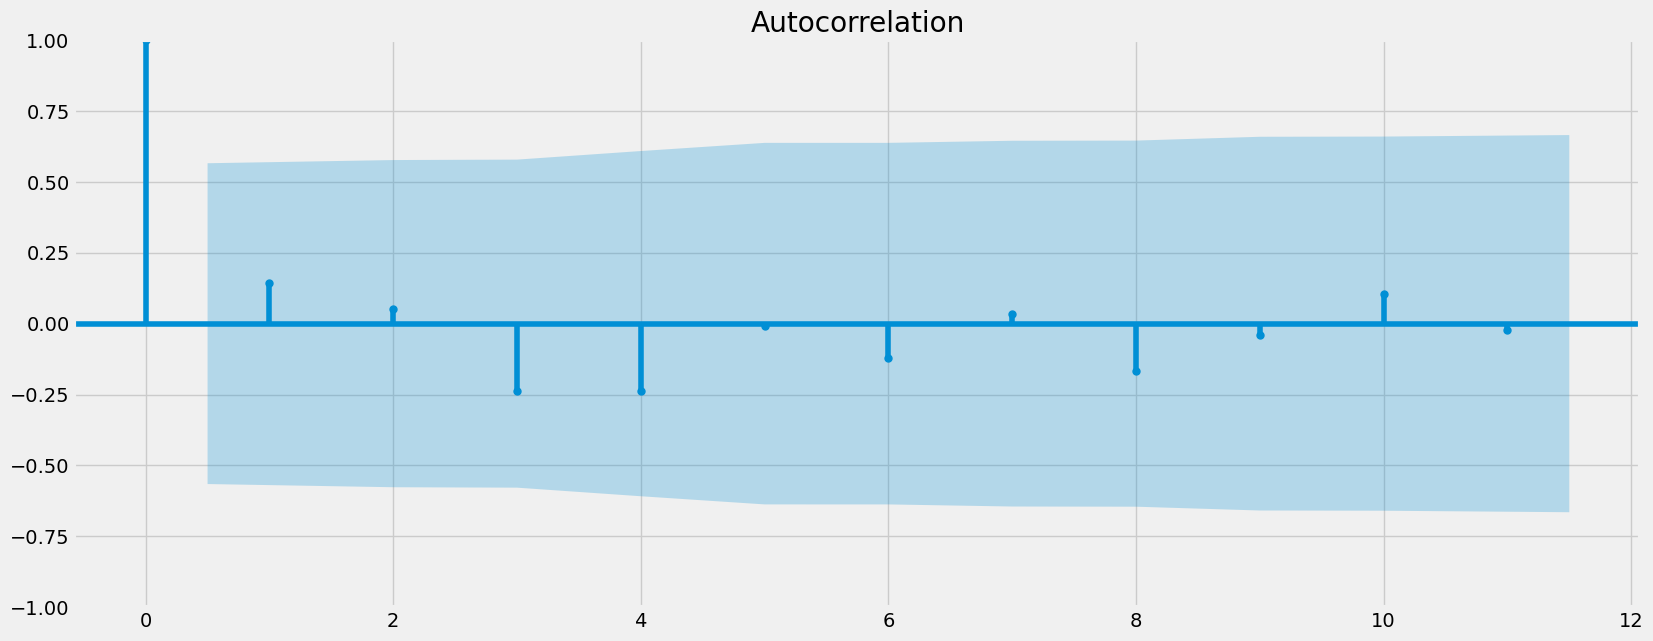

In [34]:
# testing autocorrelation in stationary data
plot_acf(data_diff)
plt.show()

The autocorrelation has improved (there are fewer autocorrelated terms). There is one lag less reaching above the confidence intervall. 

There is still one lag left out of the intervall but a second round of differencing is not necessary